## Final Project Submission

Please fill out:
* Student name: Alexander Claudino Daffara
* Student pace: full time
* Scheduled project review date/time: Jan 27th 2023
* Instructor name: Brendan Hutchinson
* Blog post URL: https://medium.com/@alexanderdaffara


MARKET UNDERSTANDING
 - film industry
 - Joining a competitive field where other originally-tech-based companies are openning film studios
   - Amazon, Netflix, Hulu
 - Understands its huge Tech company, going in with that context ->
   - They will garner much attention with initial releases
  
BUSINESS PROBLEM
 - Microsoft wants to open a film studio
 - important questions
   
 - With little knowledge of how to make films, we will provide data-driven actionable insights to maximize ROI, visibility and reception
   - they have the financial and authorative means to tackle difficult problems


DATA
 - imdb
 - The Numbers
 - Kaggle's The Movies Dataset: 
   - an ensemble of data collected from TMDB and GroupLens:
   - https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/versions/5resource=download&select=movies_metadata.csv
   
ASSUMPTIONS
 - Considering only movies 2013-2019, Tied to the Modern era Streaming service boom in film industry, and our limited dataset

Conclusion


 - Joining a competitive field where other originally-tech-based companies who open a film studio, also have streaming service
   - Amazon, Netflix, Hulu
 - Reach us at our linkedin for more data consulting

3 ACIONABLE INSIGHTS:
 - Spending more correlates to greater ROI in filmmaking
 - GENRES / RUNTIME per genre suggestion based on ROI
   - Top genre combinations and its relationship to spending and ROI
   - Successful Genres have significant runtime variance, suggesting runtime per genre
 - Suggestion of gender for each of the top genres
   - Male lead actors lead to slightly higher ratings and ROI, but show much more representation
     and Microsoft has the opportunity to partake in changes to skew the distribution with little
     loss in ROI
 

IDEAS

 - box office profit compared to:
   - runtime (DONE) -> will suggest long films
   - runtime for top genres (NEED)
   - production budget (DONE) -> suggesting spending more to make more profit
   - genre (per month/sesason?) (WORK ON MONTH SEASON)
   - by rating (r, pg, ...) (NEED)
   - male vs female lead role (NEED?)
   - movies released per region (looking at movie aka regions) (NEED?)
   - prominent role categories present (sound design, video etc.) (NEED?)
   - best directors and writers (NEED?)
   
 - rating compared to
   - box office

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
import calendar
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Importing all the Data

## imdb

In [2]:
%%bash
sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [3]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics """, conn)    # 146144  movie_id  (unique)
directors_df = pd.read_sql("""SELECT * FROM directors """, conn)          # 291174  movie_id  (140417 unique)
known_for_df = pd.read_sql("""SELECT * FROM known_for """, conn)          # 1638260 person_id 
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas """, conn)        # 331703  movie_id
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings """, conn)  # 73856   movie_id
persons_df = pd.read_sql("""SELECT * FROM persons """, conn)              # 606648  person_id
principals_df = pd.read_sql("""SELECT * FROM principals """, conn)        # 1028186 principals
writers_df = pd.read_sql("""SELECT * FROM writers """, conn)              # 255873  movie_id
conn.close()

In [4]:
# df_with_directors -> movie basics + directors (contains duplicates when a movie has multiple directors)
directors_df = directors_df.drop_duplicates()
df_with_directors = movie_basics_df.merge(directors_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_directors = df_with_directors.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_directors.rename(columns={'primary_name':'director_name','person_id':'director_id'}, inplace=True)
df_with_directors.drop(columns=['director_id'], inplace=True)
df_with_directors.drop_duplicates(inplace=True)
df_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Valeria Sarmiento
...,...,...,...,...,...,...,...
169257,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
169258,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
169259,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
169260,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [5]:
# df_with_writers -> movie basics + writers (contains duplicates when a movie has multiple writers)
writers_df = writers_df.drop_duplicates()
df_with_writers = movie_basics_df.merge(writers_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_writers = df_with_writers.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_writers.rename(columns={'primary_name':'writer_name','person_id':'writer_id'}, inplace=True)
df_with_writers.drop(columns=['writer_id'], inplace=True)
df_with_writers.drop_duplicates(inplace=True)
df_with_writers

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
...,...,...,...,...,...,...,...
214230,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
214231,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dr. Sudhir Nikam
214232,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
214233,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


## bom movie gross

In [6]:
# df_with_gross matches gross for all movies with the same name
gross_df = pd.read_csv('data/bom.movie_gross.csv')
gross_df.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
gross_df['foreign_gross'] = gross_df['foreign_gross'].map(lambda x: float(x.replace(',',"")))
gross_df['total_gross'] = gross_df['foreign_gross'] + gross_df['domestic_gross']
df_with_gross = movie_basics_df.merge(gross_df,
                                      how='inner',
                                      left_on=['primary_title','start_year'],
                                      right_on=['title','year'])
df_with_gross = df_with_gross.loc[df_with_gross['year'] >= 2013] 
df_with_gross

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4
13,tt0435651,The Giver,The Giver,2014,97.0,"Drama,Romance,Sci-Fi",The Giver,Wein.,45100000.0,21900000.0,2014,67000000.0
18,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",Wonder Woman,WB,412600000.0,409300000.0,2017,821900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",Hereditary,A24,44100000.0,35300000.0,2018,79400000.0
1264,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",The Mule,WB,103800000.0,68700000.0,2018,172500000.0
1265,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0
1266,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U,WGUSA,747000.0,82100000.0,2018,82847000.0


## TN movie budgets

In [7]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

budgets_df.drop(columns=['id'], inplace=True)
# convert dates and prices from strings to numbers
budgets_df['release_year'] = budgets_df['release_date'].map(lambda x: int(x[-4:]))
budgets_df['production_budget'] = budgets_df['production_budget'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].map(lambda x: x.replace('$','').replace(',','')).astype(int)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].map(lambda x: x.replace('$','').replace(',','')).astype('int64')
budgets_df['foreign gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['profit'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

# drop rows with no worldwide gross
budgets_df = budgets_df.loc[budgets_df['worldwide_gross'] != 0]
print(budgets_df.shape)
# merge with imdb
df_with_budgets = movie_basics_df.merge(budgets_df,
                                     how='inner',
                                     left_on=['primary_title','start_year'],
                                     suffixes=['_imdb','_budgets'],
                                     right_on=['movie','release_year'])
print(df_with_budgets.shape)

# modern_budgets_df since 2013
modern_budgets_df_reset = budgets_df.loc[budgets_df['release_year'] >= 2013]
modern_budgets_df = modern_budgets_df_reset.copy()
vintage_budgets_df = budgets_df.loc[budgets_df['release_year'] < 2013]
modern_budgets_df

(5415, 8)
(1422, 14)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,foreign gross,profit
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000,-200237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095,1072413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,696540365,999721747
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1116648995,1747311220
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718,1748134200
...,...,...,...,...,...,...,...,...
5710,"Jan 25, 2013",Supporting Characters,60000,4917,4917,2013,0,-55083
5719,"Jul 31, 2015",Counting,50000,8374,8374,2015,0,-41626
5737,"Mar 18, 2016",Krisha,30000,144822,144822,2016,0,114822
5744,"Jan 27, 2017",Emily,27000,3547,3547,2017,0,-23453


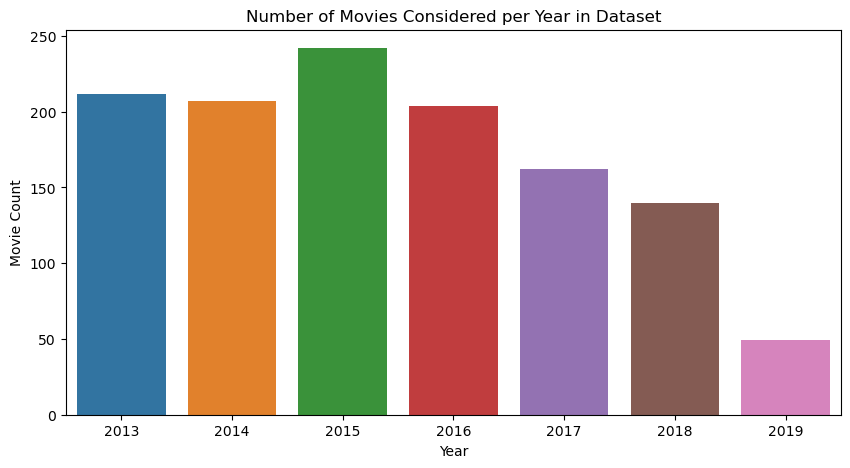

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax,
            errwidth=0).set(title='Number of Movies Considered per Year in Dataset', ylabel='Movie Count', xlabel='Year')
plt.show()

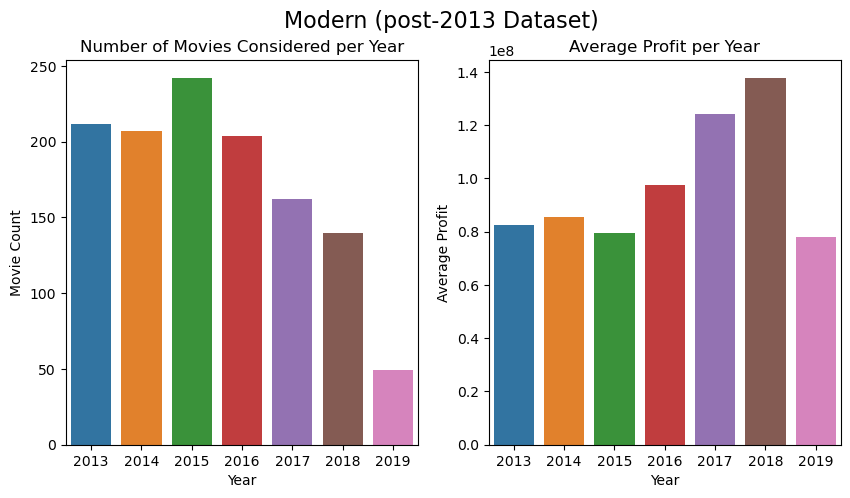

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
data = modern_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax1,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
data = modern_budgets_df.groupby('release_year').mean()
sns.barplot(x = data.index,
            y = 'profit',
            data=data,
            ax=ax2,
            errwidth=0).set(title='Average Profit per Year', ylabel='Average Profit', xlabel='Year')
fig.suptitle('Modern (post-2013 Dataset)', fontsize=16)
plt.show()

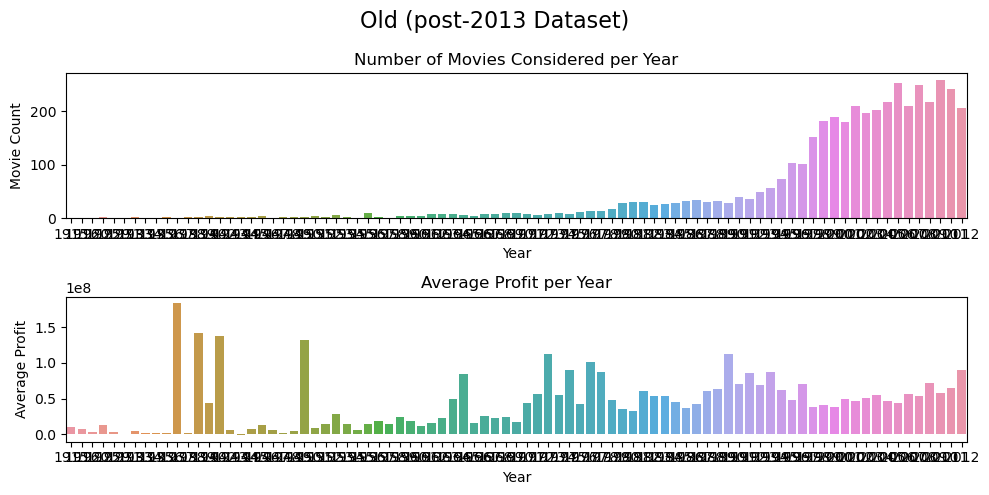

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,5))
data = vintage_budgets_df.release_year.value_counts()
sns.barplot(x = data.index,
            y = data,
            ax=ax1,
            errwidth=0).set(title='Number of Movies Considered per Year', ylabel='Movie Count', xlabel='Year')
data = vintage_budgets_df.groupby('release_year').mean()
sns.barplot(x = data.index,
            y = 'profit',
            data=data,
            ax=ax2,
            errwidth=0).set(title='Average Profit per Year', ylabel='Average Profit', xlabel='Year')
fig.suptitle('Old (post-2013 Dataset)', fontsize=16)
plt.tight_layout()
plt.show()

# Cost vs Profit

RESET MODERN_BUDGETS_DF

In [11]:
modern_budgets_df = modern_budgets_df_reset.copy() # 1216 x 8
modern_budgets_df.shape

(1216, 8)

EXCLUDE MODERN_BUDGETS_DF   PROFIT OUTLIERS

In [12]:
# THIS WILL SET MODERN BUDGETS TO EXCLUDE 150/1216 PROFIT OUTLIERS
modern_budgets_df = modern_budgets_df_reset.copy() # 1216 x 8
iqr = modern_budgets_df['profit'].quantile(.75) - modern_budgets_df['profit'].quantile(.25)
upper_bound = modern_budgets_df.profit.mean() + 1.5 * iqr
lower_bound = modern_budgets_df.profit.mean() - 1.5 * iqr
modern_budgets_df = modern_budgets_df.loc[(modern_budgets_df.profit < upper_bound) & \
                                          (modern_budgets_df.profit > lower_bound)]

dataset cost v profit

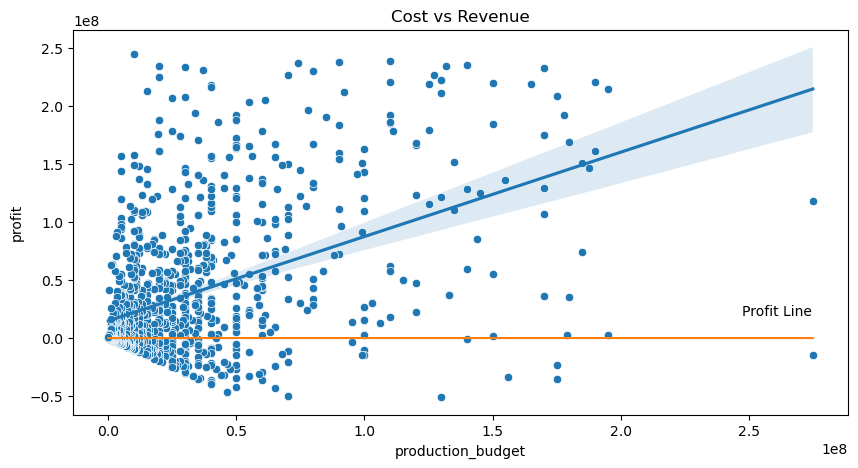

0.7777708411019403

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x='production_budget',
            y='profit',
            scatter=False,
            data=modern_budgets_df,
            ax=ax)
sns.scatterplot(x='production_budget',
                y='profit',
                data=modern_budgets_df,
                ax=ax)
sns.lineplot(x=range(0,modern_budgets_df.production_budget.max(), 10000),
             y=[0] * int(modern_budgets_df.production_budget.max()/10000),
             ax=ax)
ax.set(title='Cost vs Revenue')
ax.text(modern_budgets_df.production_budget.max()*.9,20000000,'Profit Line')
plt.show()
modern_budgets_df.corr()['production_budget']['worldwide_gross']

# Genre vs profit

MULTI-Genre grouping

In [14]:
# profit_genreTuples_df has genres tuples for each film split (exploded) into multiple rows
genreTuples_df = movie_basics_df.dropna(subset=['genres'])[['movie_id',
                                                            'primary_title',
                                                            'start_year',
                                                            'genres']]
genreTuples_df['genres'] = genreTuples_df['genres'].map(lambda x: tuple(x.split(',')))
profit_genreTuples_df = modern_budgets_df.merge(genreTuples_df,
                                                how='inner',
                                                left_on=['movie',
                                                         'release_year'],
                                                right_on=['primary_title', 
                                                          'start_year'])[['movie',
                                                                          'release_year',
                                                                          'profit',
                                                                          'genres']]
# FOR CONCATENATED VERSION
exploded = profit_genreTuples_df.explode('genres')

# ONLY EXPLODING 3-GRAMS INTO 2-GRAMS
for i in profit_genreTuples_df.index:
    row = profit_genreTuples_df.iloc[i]
        
    genres = row['genres']
    if len(genres) == 3:
        new_row = {col:row[col] for col in row.index.to_list()}

        # genres[0,1]
        new_row['genres'] = (genres[0],genres[1])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        
        # genres[0,2]
        new_row['genres'] = (genres[0],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)
        
        # genres[1,2]
        new_row['genres'] = (genres[1],genres[2])
        profit_genreTuples_df = profit_genreTuples_df.append(new_row, ignore_index=True)


# REMOVING 3-GRAMS
def keep_3_grams(keep, x):
    if keep:
        return len(x) >= 2
    else:
        return len(x) == 2

three_or_two_grams = \
    profit_genreTuples_df.loc[profit_genreTuples_df['genres'].map(lambda x: \
                                                                  True if keep_3_grams(True,x) else False)]

# for some reason exploded has duplicates
profit_genreTuples_df = pd.concat([three_or_two_grams,exploded]).drop_duplicates()
profit_genreTuples_df

,movie,release_year,profit,genres
0,Solo: A Star Wars Story,2018,118151347,"(Action, Adventure, Fantasy)"
1,The Lone Ranger,2013,-14997885,"(Action, Adventure, Western)"
2,The Mummy,2017,214953905,"(Action, Adventure, Fantasy)"
3,Jack the Giant Slayer,2013,2687603,"(Adventure, Fantasy)"
4,The Great Gatsby,2013,161040419,"(Drama, Romance)"
...,...,...,...,...
786,Counting,2015,-41626,Documentary
787,Emily,2017,-23453,Drama
788,Exeter,2015,464792,Horror
788,Exeter,2015,464792,Mystery


In [15]:
""" FOR LABELLING GENRE PLOT"""
def get_pretty_labels(ugly):
    labels = []
    for genre in ugly:
        if type(genre) == tuple:
            if len(genre) == 3:
                labels.append('{}, {} & {}'.format(genre[0],genre[1],genre[2]))
            if len(genre) == 2:
                labels.append('{} & {}'.format(genre[0],genre[1]))
        else:
            labels.append(genre)
    return labels

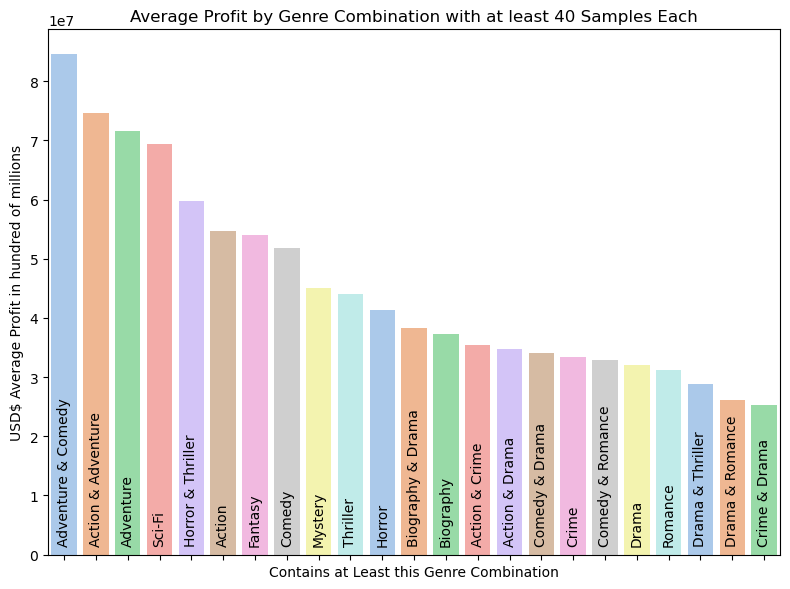

In [16]:
# DATA FOR PROFIT PER GENRETUPLES WITH AT LEAST n SAMPLES EACH
num_samples_per_genre_tuple = 40

# reset grouped_tuples so its not just the top 20
grouped_tuples_df = profit_genreTuples_df.groupby('genres').mean().sort_values(by='profit', ascending=False)

# grouped_tuple_count_df has 129 unique genre-combo movies and single-genre movies (29 with over 30 samples)
grouped_tuple_count_df = profit_genreTuples_df.groupby('genres').count()
grouped_tuple_count_df = grouped_tuple_count_df.loc[grouped_tuple_count_df['profit'] > num_samples_per_genre_tuple]
tuple_profit_30samples_df = grouped_tuples_df.join(grouped_tuple_count_df, how='inner', rsuffix='_count').sort_values(by='profit', ascending=False)

fig, ax = plt.subplots(figsize=(8,6))

xlabels = get_pretty_labels(tuple_profit_30samples_df.index)

sns.barplot(x=tuple_profit_30samples_df.index,
            y='profit',
            data=tuple_profit_30samples_df,
            errwidth=0,
            palette='pastel',
            ax=ax)

ax.set_title('Average Profit by Genre Combination with at least {} Samples Each'.format(num_samples_per_genre_tuple))
ax.set_xlabel('Contains at Least this Genre Combination')
ax.set_ylabel('USD$ Average Profit in hundred of millions')
ax.tick_params(axis='x', pad=-10)
ax.set_xticklabels(xlabels, rotation=90, va='bottom', color='black')
fig.tight_layout()
plt.show()

Top 1 Genre Highlighted Cost v Profit

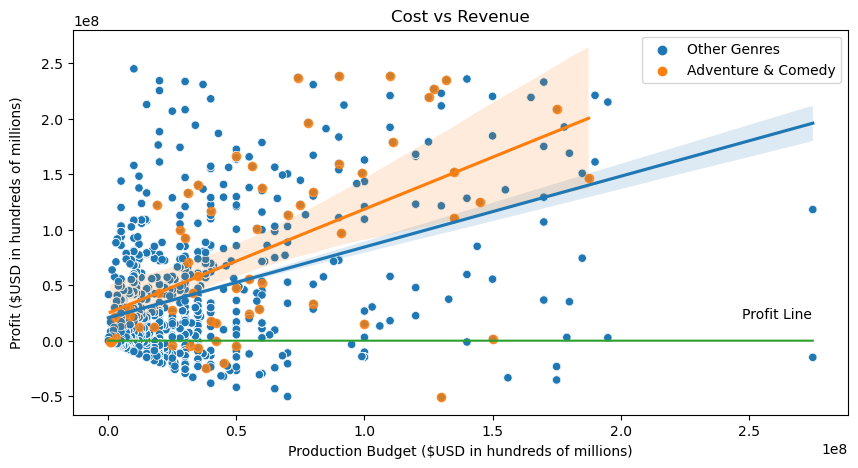

In [17]:
""" cost_v_profit_df has ['movie','release_year','genres' (optimized),'production_budget','profit'] """

cost_v_profit_df = profit_genreTuples_df.merge(modern_budgets_df[['movie','release_year','production_budget']],
                                               how='inner',
                                               left_on=['movie', 'release_year'],
                                               right_on=['movie','release_year'],
                                               suffixes=['_',''])

top4_genres = [('Adventure', 'Comedy'), ('Action', 'Adventure'), 'Adventure', 'Sci-Fi']
top4_loc = cost_v_profit_df['genres'].map(lambda x: True if x in top4_genres else False)
cost_v_profit_df['is_top4_genres'] = top4_loc

top_genre = [('Adventure', 'Comedy')]
top_loc = cost_v_profit_df['genres'].map(lambda x: True if x in top_genre else False)
cost_v_profit_df['is_top_genre'] = top_loc.map(lambda x: 'Adventure & Comedy' if x else 'Other Genres')

fig, ax = plt.subplots(figsize=(10,5))

data = cost_v_profit_df
sns.scatterplot(x='production_budget',
                y='profit',
                hue='is_top_genre',
                legend='auto',
                data=data,
                ax=ax)

data = cost_v_profit_df.loc[~top_loc]
sns.regplot(x='production_budget',
            y='profit',
            scatter=False,
            data=data,
            ax=ax)

data = cost_v_profit_df.loc[top_loc]
sns.regplot(x='production_budget',
            y='profit',
            scatter=True,
            data=data,
            ax=ax)

sns.lineplot(x=range(0,modern_budgets_df.production_budget.max(), 10000),
             y=[0] * int(modern_budgets_df.production_budget.max()/10000),
             ax=ax)

ax.legend(title='')
ax.set(title='Cost vs Revenue', 
       xlabel='Production Budget ($USD in hundreds of millions)',
       ylabel='Profit ($USD in hundreds of millions)')
ax.text(modern_budgets_df.production_budget.max()*.9,20000000,'Profit Line')
plt.show()

# Profit vs runtime

In [18]:
# CONSIDER IMPUTING MEAN/MEDIAN for 31k out of 146k 
runtime_df = movie_basics_df.dropna(subset=['runtime_minutes'])
runtime_df = runtime_df.loc[runtime_df['runtime_minutes'] < 200]
profit_runtime_df = modern_budgets_df.merge(runtime_df[['primary_title','start_year','runtime_minutes']],
                                            how='inner',
                                            left_on=['movie','release_year'],
                                            right_on=['primary_title','start_year'])
def get_length(x):
    short_bound = profit_runtime_df['runtime_minutes'].quantile(.33)
    long_bound = profit_runtime_df['runtime_minutes'].quantile(.66)
    if x < short_bound:
        return 'short'
    if x < long_bound:
        return 'medium'
    else:
        return 'long'
    

profit_runtime_df['length'] = profit_runtime_df['runtime_minutes'].map(get_length)
profit_runtime_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,foreign gross,profit,primary_title,start_year,runtime_minutes,length
0,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,2018,179383835,118151347,Solo: A Star Wars Story,2018,135.0,long
1,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,2013,170700000,-14997885,The Lone Ranger,2013,150.0,long
2,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,2017,329852780,214953905,The Mummy,2017,110.0,medium
3,"Mar 1, 2013",Jack the Giant Slayer,195000000,65187603,197687603,2013,132500000,2687603,Jack the Giant Slayer,2013,114.0,long
4,"May 10, 2013",The Great Gatsby,190000000,144840419,351040419,2013,206200000,161040419,The Great Gatsby,2013,143.0,long
...,...,...,...,...,...,...,...,...,...,...,...,...
778,"Jul 25, 2014",Happy Christmas,70000,30312,30312,2014,0,-39688,Happy Christmas,2014,82.0,short
779,"Jul 31, 2015",Counting,50000,8374,8374,2015,0,-41626,Counting,2015,111.0,medium
780,"Jan 27, 2017",Emily,27000,3547,3547,2017,0,-23453,Emily,2017,83.0,short
781,"Sep 1, 2015",Exeter,25000,0,489792,2015,489792,464792,Exeter,2015,91.0,short


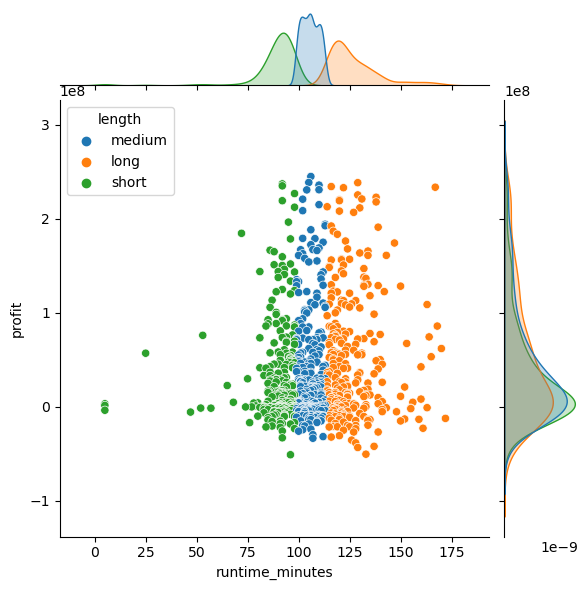

average movie runtimes per category: 
length
long      126.888060
medium    105.625468
short      88.879032
Name: runtime_minutes, dtype: float64

length value counts:
long      268
medium    267
short     248
Name: length, dtype: int64

average short profit: 33,817,284
average medium profit: 42,747,487
average long profit: 52,570,746


In [19]:
# look at runtime vs profit for the top_n highest profit films 
top_n = 783
# int(np.floor(783*.2)) # max n = 783

most_profit_df = profit_runtime_df.sort_values(by='profit', ascending=False).head(top_n)
sns.jointplot(x='runtime_minutes',
              y='profit',
              hue='length',
              data=most_profit_df,
              kind='scatter')

plt.show()
print("average movie runtimes per category: ")
print(most_profit_df.groupby('length').mean()['runtime_minutes'], end='\n\n')
print("length value counts:")
print(most_profit_df['length'].value_counts(), end='\n\n')
print("average short profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'short']['profit'].mean())))
print("average medium profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'medium']['profit'].mean())))
print("average long profit: {:,}".format(int(profit_runtime_df.loc[profit_runtime_df['length'] == 'long']['profit'].mean())))

### Runtime Distribution per top 5 Genres

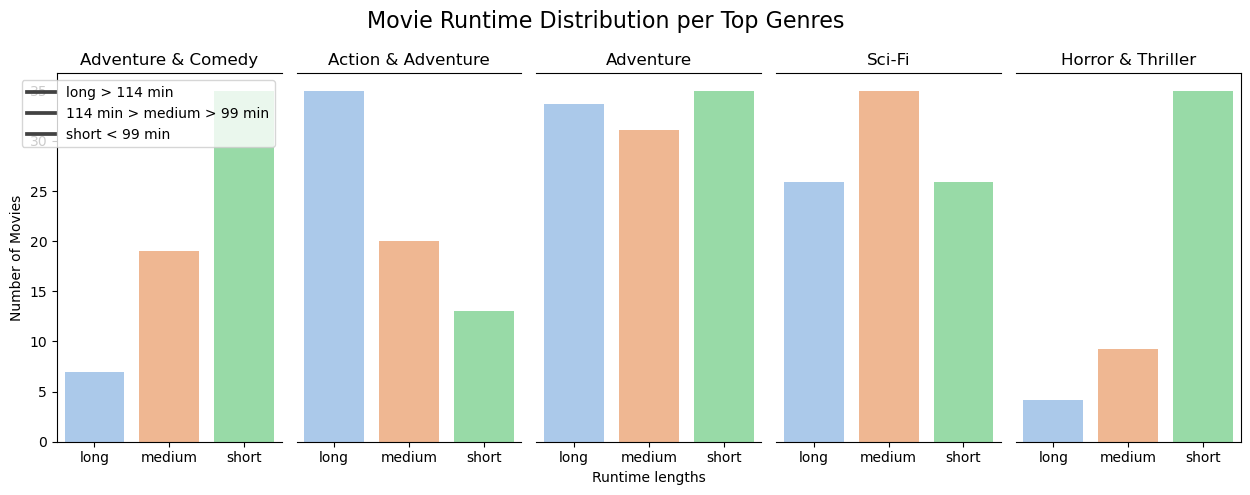

In [20]:
top5_genre_combos = [('Adventure', 'Comedy'), 
                     ('Action', 'Adventure'), 
                     'Adventure', 
                     'Sci-Fi', 
                     ('Horror', 'Thriller')]
left = most_profit_df[['movie','release_year','profit','runtime_minutes','length']]
right = profit_genreTuples_df.loc[profit_genreTuples_df['genres'].map(lambda x: True if x in top5_genre_combos \
                                                                            else False)]
m = left.merge(right, how='inner', on=['movie','release_year'], suffixes=['_l','_r'])

genre_length_dfs = [m.loc[m['genres'] == genre] for genre in top5_genre_combos]


fig, ax = plt.subplots(ncols=5, figsize=(13,5))

titles = get_pretty_labels(top5_genre_combos)
for i, df in enumerate(genre_length_dfs):
    grouped = df.groupby('length').count()
    sns.barplot(x=grouped.index.to_list(), 
                y=grouped['movie'], 
                palette='pastel',
                ax=ax[i]).set(title=str(titles[i]))
    ax[i].set_ylabel('')
    ax[i].get_yaxis().set_visible(False)
    if i != 0: ax[i].spines[['right', 'left']].set_visible(False)
ax[0].spines[['right']].set_visible(False)
ax[len(titles)-1].spines[['right']].set_visible(True)
ax[0].get_yaxis().set_visible(True)
ax[0].set_ylabel('Number of Movies')
ax[len(titles)//2].set_xlabel('Runtime lengths')

ax[0].legend(['long > 114 min','114 min > medium > 99 min','short < 99 min'])
fig.suptitle('Movie Runtime Distribution per Top Genres', fontsize=16)

plt.tight_layout()
plt.show()

# Lead Cast Gender Analysis

compare leading role cast gender with rating/REVENUE 
 - slight male dominated distributions, males have much more representation, on average results in higher 
   rating and revenue, !suggest the role of a large company to partake in skewing the distribution and
   changing the industry

In [21]:
credits_df = pd.read_csv('data/kaggle_data/credits.csv')
credits_df['cast'] = credits_df['cast'].map(lambda x: eval(x))
# drop nan cast rows
credits_df.drop(index=credits_df.loc[credits_df['cast'].map(lambda x: len(x) == 0)].index, inplace=True)

# sort the movie list by role (order), and get the movies leading cast gender
def get_lead_gender(movie):
    gender_id = sorted(movie, key=lambda x: x['order'])[0]['gender']
    if not gender_id: return gender_id
    return 'Male' if gender_id == 2 else 'Female'

# sort the movie list by role (order), and get the movies leading cast name
def get_lead_name(movie):
    return sorted(movie, key=lambda x: x['order'])[0]['name']

credits_df['cast_lead_gender'] = credits_df['cast'].map(get_lead_gender)
credits_df['cast_lead_name'] = credits_df['cast'].map(get_lead_name)
credits_df.drop(credits_df.loc[credits_df['cast_lead_gender'] == 0].index, inplace=True)
credits_df.drop(index=credits_df.loc[credits_df['id'].duplicated()].index, inplace=True)
credits_df

,cast,crew,id,cast_lead_gender,cast_lead_name
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Male,Tom Hanks
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Male,Robin Williams
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Male,Walter Matthau
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Female,Whitney Houston
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Male,Steve Martin
...,...,...,...,...,...
45470,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",30840,Male,Patrick Bergin
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,Female,Leila Hatami
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Female,Angel Aquino
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Female,Erika Eleniak


In [22]:
meta_data_df = pd.read_csv('data/kaggle_data/movies_metadata.csv')
meta_data_df = meta_data_df[['id','imdb_id','title','release_date','revenue','runtime','vote_average','vote_count']]

# drop 3  with id values that are dates
meta_data_df.drop(index=meta_data_df.loc[~meta_data_df['id'].str.isnumeric()].index, inplace=True)

# set id column values to int
meta_data_df['id'] = meta_data_df['id'].astype(int)

# drop druplicate id's
meta_data_df.drop(index=meta_data_df.loc[meta_data_df['id'].duplicated()].index, inplace=True)

# drop movies pre 2013
meta_data_df.dropna(subset=['release_date'], inplace=True)
meta_data_df['release_date'] = meta_data_df['release_date'].map(lambda x: x[:4]).astype(int)
meta_data_df.drop(index=meta_data_df.loc[meta_data_df['release_date'] < 2013].index, inplace=True)

meta_data_df

,id,imdb_id,title,release_date,revenue,runtime,vote_average,vote_count
1081,141210,tt2250194,The Sleepover,2013,0.0,6.0,8.0,1.0
4356,110428,tt2018086,Camille Claudel 1915,2013,115860.0,95.0,7.0,20.0
11251,171771,tt2449612,The Scar,2013,0.0,90.0,0.0,0.0
14765,31156,tt1472122,Dante's Hell Animated,2013,0.0,35.0,8.0,4.0
18082,157924,tt2806964,Pompeii: The Mystery of the People Frozen in Time,2013,0.0,59.0,4.5,2.0
...,...,...,...,...,...,...,...,...
45437,455661,tt6969946,In a Heartbeat,2017,0.0,4.0,8.3,146.0
45438,327237,tt3814486,"Blood, Sweat and Tears",2015,0.0,111.0,6.8,11.0
45453,404604,tt5690142,Mom,2017,0.0,146.0,6.6,14.0
45454,420346,tt4130180,The Morning After,2015,0.0,79.0,4.0,2.0


In [23]:
kaggle_cleaned_df = meta_data_df.merge(credits_df[['id','cast_lead_name','cast_lead_gender']],
                                       how='inner',
                                       on='id')
kaggle_cleaned_df

,id,imdb_id,title,release_date,revenue,runtime,vote_average,vote_count,cast_lead_name,cast_lead_gender
0,110428,tt2018086,Camille Claudel 1915,2013,115860.0,95.0,7.0,20.0,Juliette Binoche,Female
1,171771,tt2449612,The Scar,2013,0.0,90.0,0.0,0.0,Marc Béland,Male
2,31156,tt1472122,Dante's Hell Animated,2013,0.0,35.0,8.0,4.0,Jeff Conaway,Male
3,70074,tt1308729,Bullet to the Head,2013,9489829.0,92.0,5.2,490.0,Sylvester Stallone,Male
4,155288,tt1830495,Bela Kiss: Prologue,2013,0.0,106.0,4.4,4.0,Kristina Klebe,Female
...,...,...,...,...,...,...,...,...,...,...
5296,445126,tt5864238,Can't Buy My Love,2017,0.0,86.0,7.0,7.0,Adelaide Kane,Female
5297,401687,tt5775814,Hopeless Romantic,2016,0.0,86.0,4.3,3.0,Christa Brittany Allen,Female
5298,461297,tt6212210,Cop and a Half: New Recruit,2017,0.0,97.0,6.0,1.0,Lou Diamond Phillips,Male
5299,327237,tt3814486,"Blood, Sweat and Tears",2015,0.0,111.0,6.8,11.0,Martijn Fischer,Male


Gender vs movie ratings

num movies  3767


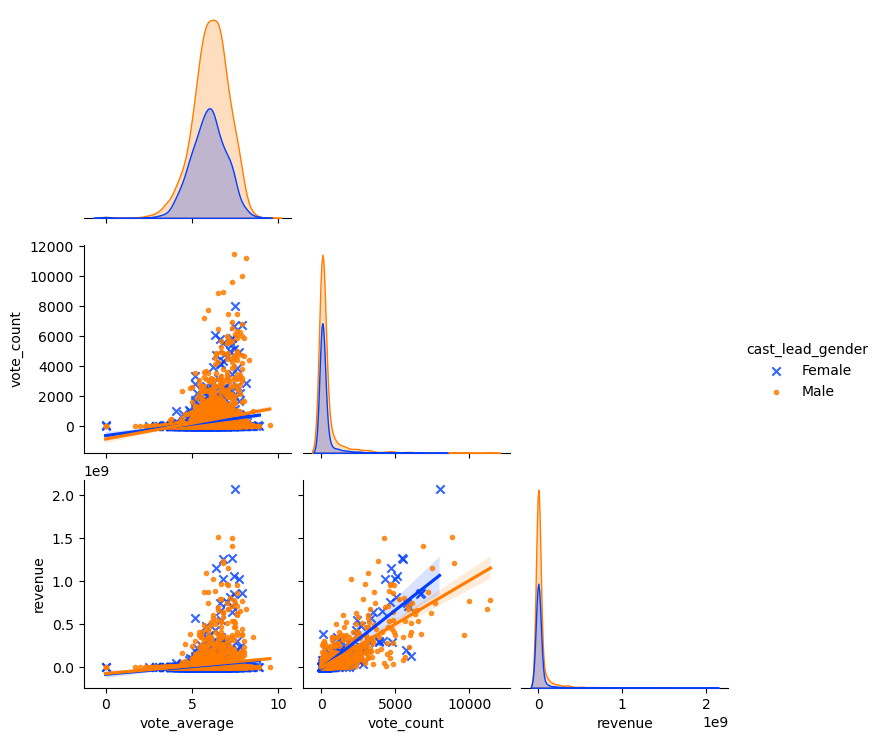

In [24]:
# min_votes of 100 -> 1315 movies, 
# min_votes of 10 -> 3767 movies
min_votes = 10
gender_rating_df = kaggle_cleaned_df.loc[kaggle_cleaned_df['vote_count'] >= min_votes,
                                         ['vote_average','vote_count','revenue','cast_lead_gender']]
print('num movies ', len(gender_rating_df))

# fig, ax = plt.subplots(figsize=(16,20))
data = gender_rating_df
sns.pairplot(kind='reg', hue='cast_lead_gender', palette='bright', data=data, markers=['x','.'], corner=True)
plt.show()

Movie Rating Distribution by Lead Cast Gender

num movies:  3767


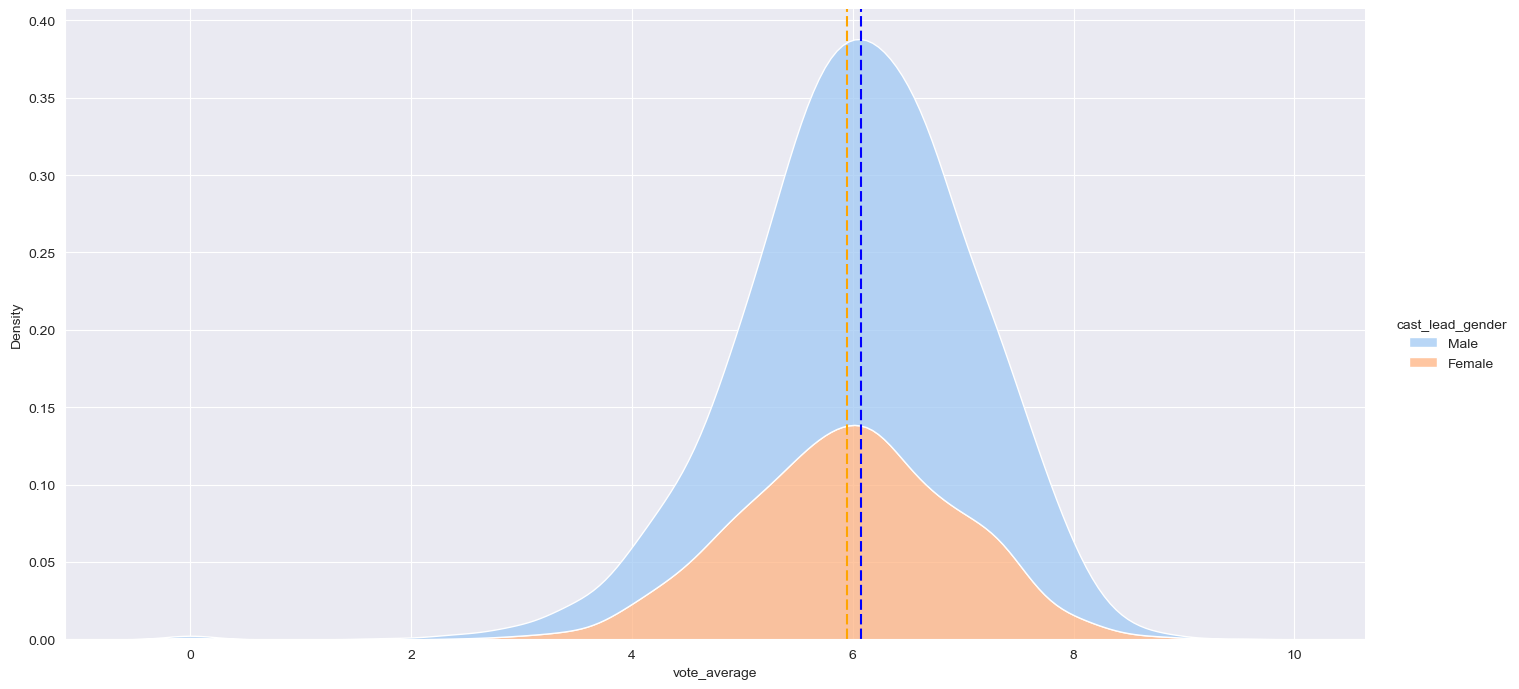

In [25]:
min_votes = 10
gender_rating_df = kaggle_cleaned_df.loc[kaggle_cleaned_df['vote_count'] >= min_votes,
                                         ['vote_average','vote_count','revenue','cast_lead_gender']]
print('num movies: ', len(gender_rating_df))


sns.set_style('darkgrid')

data = gender_rating_df
ax = sns.displot(x = 'vote_average', 
                 data=data, 
                 hue='cast_lead_gender', 
                 kind='kde', 
                 hue_order=['Male','Female'], 
                 palette='pastel', 
                 multiple='stack',
                 height=7, 
                 aspect=2)

female_mean = gender_rating_df.groupby('cast_lead_gender').mean().loc['Female', 'vote_average']
plt.axvline(female_mean,0,200, color='orange', dashes=[5,2])
male_mean = gender_rating_df.groupby('cast_lead_gender').mean().loc['Male', 'vote_average']
plt.axvline(male_mean,0,200, color='blue', dashes=[5,2])

plt.show()

Movie Profit Distribution by Lead Cast Gender

num movies:  564


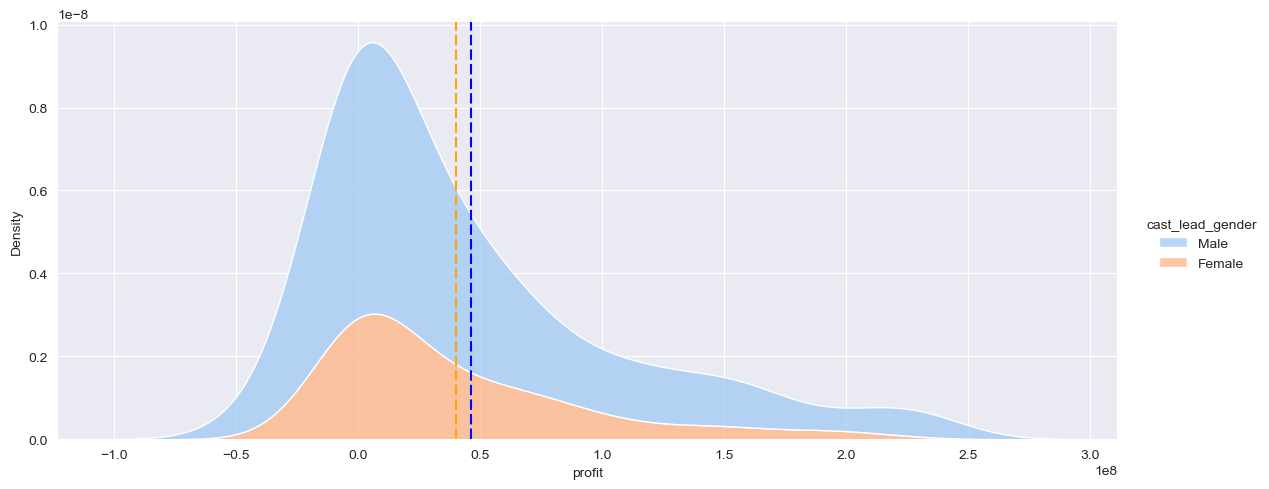

In [26]:
gender_profit_df = kaggle_cleaned_df[['title','release_date','revenue','cast_lead_gender']]
gender_profit_df = gender_profit_df.merge(modern_budgets_df[['movie','release_year','profit']],
                                          how='inner',
                                          left_on=['title','release_date'],
                                          right_on=['movie','release_year'],
                                          suffixes=['_l','_r'])
print('num movies: ', len(gender_profit_df))


sns.set_style('darkgrid')

data = gender_profit_df
column_name = 'profit'
ax = sns.displot(x = column_name, 
                 data=data, 
                 hue='cast_lead_gender', 
                 hue_order=['Male','Female'], 
                 multiple='stack',
                 palette='pastel', 
                 kind='kde', 
                 aspect=2.3)

female_mean = gender_profit_df.groupby('cast_lead_gender').mean().loc['Female', column_name]
plt.axvline(female_mean,0,200, color='orange', dashes=[5,2])
male_mean = gender_profit_df.groupby('cast_lead_gender').mean().loc['Male', column_name]
plt.axvline(male_mean,0,200, color='blue', dashes=[5,2])

plt.show()

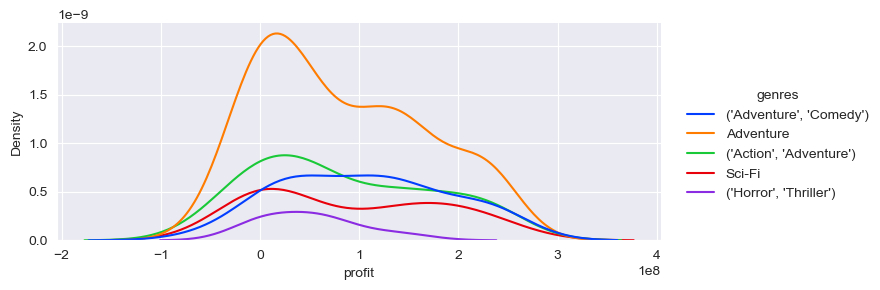

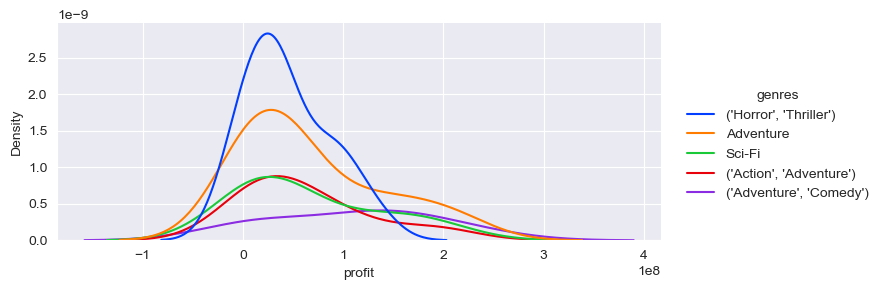

In [27]:
gender_profit_genre_df = kaggle_cleaned_df[['title','release_date','revenue','cast_lead_gender']]
gender_profit_genre_df = gender_profit_genre_df.merge(profit_genreTuples_df[['movie',
                                                                         'release_year',
                                                                         'profit',
                                                                         'genres']],
                                                      how='inner',
                                                      left_on=['title','release_date'],
                                                      right_on=['movie','release_year'],
                                                      suffixes=['_l','_r'])


sns.set_style('darkgrid')
top5_genre_combos = [('Adventure', 'Comedy'), 
                     ('Action', 'Adventure'), 
                     'Adventure', 
                     'Sci-Fi', 
                     ('Horror', 'Thriller')]
genre_loc = gender_profit_genre_df['genres'].map(lambda x: x in top5_genre_combos)
gender_profit_genre_df = gender_profit_genre_df.loc[genre_loc]
gender_profit_genre_df['genres'] = gender_profit_genre_df['genres'].astype(str)

data = gender_profit_genre_df.loc[gender_profit_genre_df['cast_lead_gender'] == 'Male']
column_name = 'profit'
ax = sns.displot(x = column_name, 
                 data=data, 
                 hue='genres',
                 palette='bright', 
                 kind='kde', 
                 height=3,
                 aspect=2.3)

data = gender_profit_genre_df.loc[gender_profit_genre_df['cast_lead_gender'] == 'Female']
column_name = 'profit'
sns.displot(x = column_name, 
            data=data, 
            hue='genres', 
            palette='bright', 
            kind='kde', 
            height=3,
            aspect=2.3)

# female_mean = gender_profit_genre_df.groupby('cast_lead_gender').mean().loc['Female', column_name]
# plt.axvline(female_mean,0,200, color='blue', dashes=[5,2])
# male_mean = gender_profit_genre_df.groupby('cast_lead_gender').mean().loc['Male', column_name]
# plt.axvline(male_mean,0,200, color='orange', dashes=[5,2])

plt.show()